Экономика городов. Кластеризация методом k-means

##### Шарифов Фаррух Рустамович N33472

In [6]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

from sklearn.cluster import KMeans
import os

In [8]:
os.chdir("C:/Users/Farrukh99/Desktop/subjects/3/Data processing/lecture 3/Lab1")

In [9]:
df = pd.read_csv("Econom_Cities_data.csv", sep=';', decimal=',', index_col='City')

In [10]:
print(df)

                Work  Price  Salary
City                               
Amsterdam       1714   65.6    49.0
Athens          1792   53.8    30.4
Bogota          2152   37.9    11.5
Bombay          2052   30.3     5.3
Brussels        1708   73.8    50.5
Buenos_Aires    1971   56.1    12.5
Cairo          -9999   37.1 -9999.0
Caracas         2041   61.0    10.9
Chicago         1924   73.9    61.9
Copenhagen      1717   91.3    62.9
Dublin          1759   76.0    41.4
Dusseldorf      1693   78.5    60.2
Frankfurt       1650   74.5    60.4
Geneva          1880   95.9    90.3
Helsinki        1667  113.6    66.6
Hong_Kong       2375   63.8    27.8
Houston         1978   71.9    46.3
Jakarta        -9999   43.6 -9999.0
Johannesburg    1945   51.1    24.0
Kuala_Lumpur    2167   43.5     9.9
Lagos           1786   45.2     2.7
Lisbon          1742   56.2    18.8
London          1737   84.2    46.2
Los_Angeles     2068   79.8    65.2
Luxembourg      1768   71.1    71.1
Madrid          1710   93.8 

Для замены ошибочных значений, таких как work и solary в городах jakarta и ciaro, будем заполнять средным значением по выборке!

In [11]:
work = df['Work'].copy()
work['Cairo'] = None
work['Jakarta'] = None

mean = int(work.mean())
df['Work'] = work.fillna(mean)

salary = df['Salary'].copy()
salary['Cairo'] = None
salary['Jakarta'] = None

mean_s = int(salary.mean())
df['Salary'] = salary.fillna(mean_s)

df

,Work,Price,Salary
City,,,
Amsterdam,1714.0,65.6,49.0
Athens,1792.0,53.8,30.4
Bogota,2152.0,37.9,11.5
Bombay,2052.0,30.3,5.3
Brussels,1708.0,73.8,50.5
Buenos_Aires,1971.0,56.1,12.5
Cairo,1879.0,37.1,39.0
Caracas,2041.0,61.0,10.9
Chicago,1924.0,73.9,61.9


Стандартизация данных.

Так как они отличаются по смыслу и следовательно их значения различны на порядок.

In [12]:
from sklearn import preprocessing

norm = preprocessing.StandardScaler()

X = norm.fit_transform(df)

X = pd.DataFrame(X, index=df.index, columns=df.columns)

print(X)

                    Work     Price    Salary
City                                        
Amsterdam      -0.982634 -0.151250  0.395343
Athens         -0.520566 -0.698647 -0.380569
Bogota          1.612052 -1.436242 -1.168996
Bombay          1.019658 -1.788804 -1.427633
Brussels       -1.018177  0.229145  0.457917
Buenos_Aires    0.539819 -0.591951 -1.127280
Cairo          -0.005183 -1.473354 -0.021814
Caracas         0.954495 -0.364642 -1.194025
Chicago         0.261394  0.233784  0.933476
Copenhagen     -0.964862  1.040964  0.975191
Dublin         -0.716056  0.331203  0.078304
Dusseldorf     -1.107036  0.447177  0.862559
Frankfurt      -1.361766  0.261618  0.870902
Geneva          0.000740  1.254356  2.118201
Helsinki       -1.261059  2.075453  1.129539
Hong_Kong       2.933091 -0.234751 -0.489030
Houston         0.581287  0.141005  0.282711
Jakarta        -0.005183 -1.171821 -0.021814
Johannesburg    0.385797 -0.823899 -0.647549
Kuala_Lumpur    1.700911 -1.176460 -1.235741
Lagos     

Применим модель для разного числа кластеров, чтобы построить график каменистой осыпи.

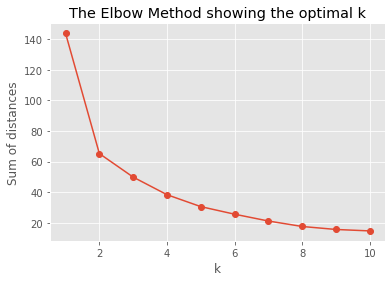

In [13]:
K = range(1, 11)
models = [KMeans(n_clusters=k, random_state=42).fit(X) for k in K]
dist = [model.inertia_ for model in models]


plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Вывод: число кластеров равно 2. Строим окончательную модель.

In [14]:
model = KMeans(n_clusters=2, random_state=42, max_iter=300, n_init=10, verbose=0)
model.fit(df)
df['cluster'] = model.labels_
df.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
0,2059.166667,58.477778,24.888889
1,1772.300000,75.090000,48.303333


In [15]:
df['cluster'].sort_values()

City
Los_Angeles       0
Panama            0
Houston           0
Hong_Kong         0
Mexico_City       0
Singpore          0
New_York          0
Johannesburg      0
Taipei            0
Caracas           0
Tel_Aviv          0
Buenos_Aires      0
Nairobi           0
Bombay            0
Bogota            0
Manila            0
Chicago           0
Kuala_Lumpur      0
Nicosia           1
Oslo              1
San_Paulo         1
Rio_de_Janeiro    1
Seoul             1
Stockholm         1
Sydney            1
Tokyo             1
Toronto           1
Paris             1
Montreal          1
Amsterdam         1
Madrid            1
Athens            1
Brussels          1
Cairo             1
Copenhagen        1
Dublin            1
Dusseldorf        1
Frankfurt         1
Geneva            1
Helsinki          1
Jakarta           1
Lagos             1
Lisbon            1
London            1
Vienna            1
Luxembourg        1
Milan             1
Zurich            1
Name: cluster, dtype: int32